In [88]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

WORDCLOUD FOR KAGGLE NEWS

In [89]:
try:
    import pycaret
except:
    !pip install pycaret

try:
    import explainerdashboard
except:
    !pip install explainerdashboard    

In [90]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
import re
import string

In [92]:
df_fake = pd.read_csv("newsdata/Fake.csv")
df_true = pd.read_csv("newsdata/True.csv")

In [93]:
df_true['class'] = 1
df_fake['class'] = 0

fake_news_df = pd.concat([df_true,df_fake])

In [94]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [95]:
fake_news_df = fake_news_df.sample(10000, random_state=786).reset_index(drop=True)

In [96]:
fake_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


In [99]:
colors = ['yellow', 'mediumturquoise']
labels = ['REAL','FAKE']
values = fake_news_df['class'].value_counts()/fake_news_df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [15]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ali_u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali_u\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ali_u\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import keras
import tensorflow as tf

<function matplotlib.pyplot.show(close=None, block=None)>

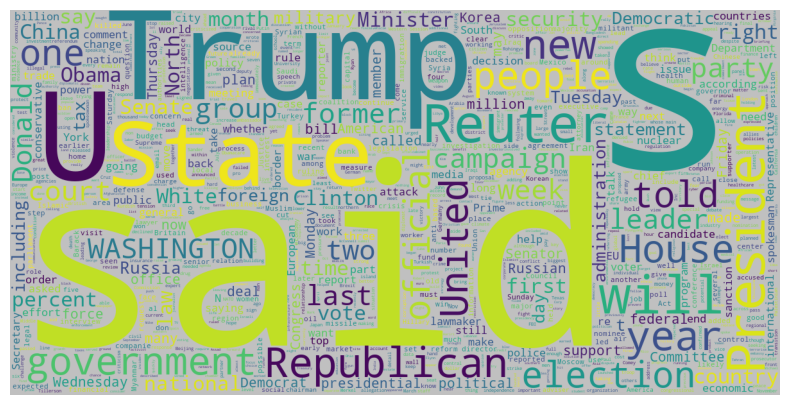

In [16]:
#Wordcloud for true news

text = " ".join(i for i in df_true.text)

wc = WordCloud(background_color = "silver", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [12, 5])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

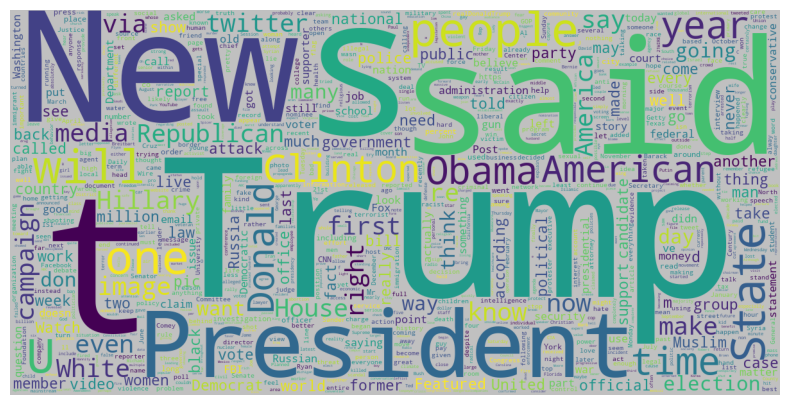

In [75]:
#Wordcloud for fake news

text = " ".join(i for i in df_fake.text)

wc = WordCloud(background_color = "silver", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [10, 5])
plt.imshow(wc)
plt.axis("off")
plt.show

In [27]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [28]:
fake_news_df["text"] = fake_news_df["text"].apply(wordopt)

In [29]:
#convert uppercase letters to lowercase letters

fake_news_df["text"] = fake_news_df["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [30]:
fake_news_df.head(2)

,text,class
0,republicans aren t very smart about a lot of t...,0
1,gay paypal ceo gives rousing speech endorsing ...,0


In [31]:
#remove special characters
fake_news_df["text"] = fake_news_df["text"].str.replace('[^\w\s]','')

<function matplotlib.pyplot.show(close=None, block=None)>

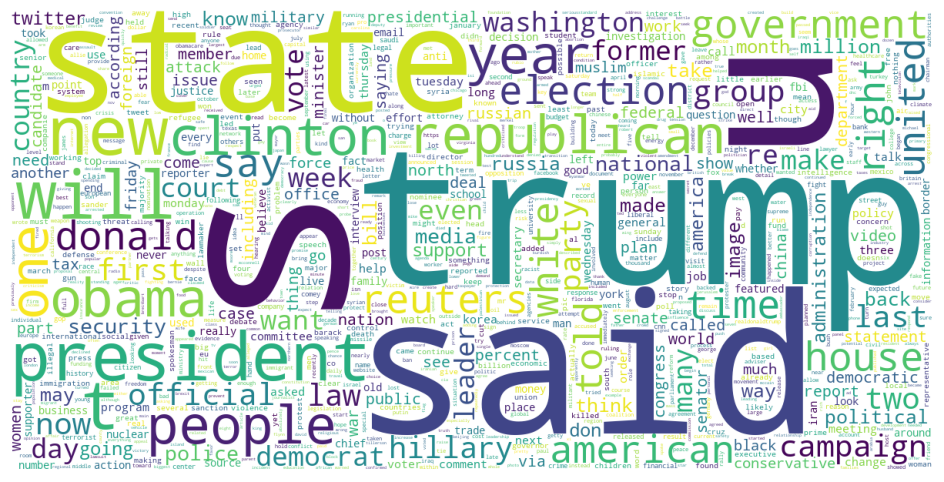

In [81]:
#Wordcloud for kaggle news dataset

text = " ".join(i for i in fake_news_df.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [12, 6])
plt.imshow(wc)
plt.axis("off")
plt.show

CREATING WORD CLOUD FOR API NEWS

In [44]:
import requests

In [45]:

import time

In [56]:
response = requests.get('https://newsapi.org/v2/everything?q=tesla&from=2022-08-22&sortBy=publishedAt&apiKey=ba335e5a525a4ad685f7ead1cadb8b4a')

In [57]:
response



<Response [200]>

In [58]:
response.json()

{'status': 'ok',
 'totalResults': 5395,
 'articles': [{'source': {'id': None, 'name': 'The Economist'},
   'author': 'The Economist',
   'title': 'Why businesses are still furiously hiring, even as a downturn looms',
   'description': 'A shake-up in the labour market gives the upper hand to job applicants',
   'url': 'https://www.economist.com/business/2022/09/04/why-businesses-are-still-furiously-hiring-even-as-a-downturn-looms',
   'urlToImage': 'https://www.economist.com/img/b/1280/720/90/media-assets/image/20220903_FNP505.jpg',
   'publishedAt': '2022-09-04T17:51:28Z',
   'content': 'Should companies be hiring or firing? Demand for workers has roared back over the past two years. But labour supply has not kept pace, and shortages are pervasive. That means many firms need to hire.… [+8970 chars]'},
  {'source': {'id': 'independent', 'name': 'Independent'},
   'author': 'Josh Marcus',
   'title': 'Elon Musk’s long history of questionable climate takes on oil, population, and nuclear'

In [59]:
fak_news = pd.DataFrame(response.json()['articles'])

In [60]:
fak_news.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'The Economist'}",The Economist,"Why businesses are still furiously hiring, eve...",A shake-up in the labour market gives the uppe...,https://www.economist.com/business/2022/09/04/...,https://www.economist.com/img/b/1280/720/90/me...,2022-09-04T17:51:28Z,Should companies be hiring or firing? Demand f...
1,"{'id': 'independent', 'name': 'Independent'}",Josh Marcus,Elon Musk’s long history of questionable clima...,The Tesla CEO has poured his life into renewab...,https://www.independent.co.uk/climate-change/n...,https://static.independent.co.uk/2022/05/20/09...,2022-09-04T17:22:48Z,"Elon Musk, the man who topped Bloombergs 2021 ..."
2,"{'id': None, 'name': 'Motorpasión'}",Daniel Murias,La guía definitiva para saber si ese modelo qu...,A mediados de agosto se celebró la Motor Week ...,https://www.motorpasion.com/compra-coches/guia...,https://img.remediosdigitales.com/564b03/bmw_1...,2022-09-04T17:00:46Z,A mediados de agosto se celebró la Motor Week ...
3,"{'id': None, 'name': 'Johnchow.com'}",John Chow,Asking Tesla Owners What They Do For a Living,"In this video, my buddy Charlie Chang ask Tesl...",https://johnchow.com/asking-tesla-owners-what-...,https://johnchow.com/wp-content/uploads/2022/0...,2022-09-04T16:46:03Z,"The Original Dot Com Mogul\r\nJohn Chow, a dam..."
4,"{'id': None, 'name': 'La Verdad Noticias'}",Erick Peraza,Tesla contrata técnicos a medida que se acerca...,Se espera que varios operadores de flotas reci...,https://laverdadnoticias.com/tecnologia/Tesla-...,https://laverdadnoticias.com/__export/16623093...,2022-09-04T16:36:36Z,Automotriz de Elon Musk contrata técnicos a me...


In [61]:
Train=fak_news.dropna()
Train

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'The Economist'}",The Economist,"Why businesses are still furiously hiring, eve...",A shake-up in the labour market gives the uppe...,https://www.economist.com/business/2022/09/04/...,https://www.economist.com/img/b/1280/720/90/me...,2022-09-04T17:51:28Z,Should companies be hiring or firing? Demand f...
1,"{'id': 'independent', 'name': 'Independent'}",Josh Marcus,Elon Musk’s long history of questionable clima...,The Tesla CEO has poured his life into renewab...,https://www.independent.co.uk/climate-change/n...,https://static.independent.co.uk/2022/05/20/09...,2022-09-04T17:22:48Z,"Elon Musk, the man who topped Bloombergs 2021 ..."
2,"{'id': None, 'name': 'Motorpasión'}",Daniel Murias,La guía definitiva para saber si ese modelo qu...,A mediados de agosto se celebró la Motor Week ...,https://www.motorpasion.com/compra-coches/guia...,https://img.remediosdigitales.com/564b03/bmw_1...,2022-09-04T17:00:46Z,A mediados de agosto se celebró la Motor Week ...
3,"{'id': None, 'name': 'Johnchow.com'}",John Chow,Asking Tesla Owners What They Do For a Living,"In this video, my buddy Charlie Chang ask Tesl...",https://johnchow.com/asking-tesla-owners-what-...,https://johnchow.com/wp-content/uploads/2022/0...,2022-09-04T16:46:03Z,"The Original Dot Com Mogul\r\nJohn Chow, a dam..."
4,"{'id': None, 'name': 'La Verdad Noticias'}",Erick Peraza,Tesla contrata técnicos a medida que se acerca...,Se espera que varios operadores de flotas reci...,https://laverdadnoticias.com/tecnologia/Tesla-...,https://laverdadnoticias.com/__export/16623093...,2022-09-04T16:36:36Z,Automotriz de Elon Musk contrata técnicos a me...
...,...,...,...,...,...,...,...,...
94,"{'id': None, 'name': 'Overclockers.ru'}",Madarator,Маск заявил о скором массовом вымирании на Земле,"Причинами мэтр электромобилей не поделился, но...",https://overclockers.ru/blog/ProKino/show/7412...,https://overclockers.ru/st/legacy/blog/415476/...,2022-09-04T00:08:30Z,""" "", - , : , - , , """" , "" "". \r\n , , . , . ..."
95,"{'id': None, 'name': 'CarScoops'}",Sebastien Bell,Tesla FSD Can Allegedly Be Tricked Into Stoppi...,Do Teslas interpret bigger stop signs as being...,https://www.carscoops.com/2022/09/tesla-fsd-ca...,https://www.carscoops.com/wp-content/uploads/2...,2022-09-03T23:49:15Z,Tesla drivers are reporting issues with their ...
96,"{'id': 'next-big-future', 'name': 'Next Big Fu...",Brian Wang,BYD and Tesla in Real Battle for Top Electric ...,"BYD is aiming for 280,000 monthly deliveries o...",https://www.nextbigfuture.com/2022/09/byd-and-...,https://nextbigfuture.s3.amazonaws.com/uploads...,2022-09-03T23:41:57Z,"BYD is aiming for 280,000 monthly deliveries o..."
97,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,3-Year Review of Tesla Model 3 Standard Range ...,We’ve had our Tesla Model 3 Standard Range Plu...,https://cleantechnica.com/2022/09/03/3-year-re...,https://cleantechnica.com/files/2021/02/Tesla-...,2022-09-03T23:38:19Z,We’ve had our Tesla Model 3 Standard Range Plu...


In [63]:
fak_news.to_csv('fake-newss.csv')

In [65]:
df_ = pd.read_csv("fake-newss.csv")

In [71]:
df_.head(3)

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
0,0,"{'id': None, 'name': 'The Economist'}",The Economist,"Why businesses are still furiously hiring, eve...",A shake-up in the labour market gives the uppe...,https://www.economist.com/business/2022/09/04/...,https://www.economist.com/img/b/1280/720/90/me...,2022-09-04T17:51:28Z,Should companies be hiring or firing? Demand f...
1,1,"{'id': 'independent', 'name': 'Independent'}",Josh Marcus,Elon Musk’s long history of questionable clima...,The Tesla CEO has poured his life into renewab...,https://www.independent.co.uk/climate-change/n...,https://static.independent.co.uk/2022/05/20/09...,2022-09-04T17:22:48Z,"Elon Musk, the man who topped Bloombergs 2021 ..."
2,2,"{'id': None, 'name': 'Motorpasión'}",Daniel Murias,La guía definitiva para saber si ese modelo qu...,A mediados de agosto se celebró la Motor Week ...,https://www.motorpasion.com/compra-coches/guia...,https://img.remediosdigitales.com/564b03/bmw_1...,2022-09-04T17:00:46Z,A mediados de agosto se celebró la Motor Week ...


In [67]:
X=df_.drop('title',axis=1)
X

,Unnamed: 0,source,author,description,url,urlToImage,publishedAt,content
0,0,"{'id': None, 'name': 'The Economist'}",The Economist,A shake-up in the labour market gives the uppe...,https://www.economist.com/business/2022/09/04/...,https://www.economist.com/img/b/1280/720/90/me...,2022-09-04T17:51:28Z,Should companies be hiring or firing? Demand f...
1,1,"{'id': 'independent', 'name': 'Independent'}",Josh Marcus,The Tesla CEO has poured his life into renewab...,https://www.independent.co.uk/climate-change/n...,https://static.independent.co.uk/2022/05/20/09...,2022-09-04T17:22:48Z,"Elon Musk, the man who topped Bloombergs 2021 ..."
2,2,"{'id': None, 'name': 'Motorpasión'}",Daniel Murias,A mediados de agosto se celebró la Motor Week ...,https://www.motorpasion.com/compra-coches/guia...,https://img.remediosdigitales.com/564b03/bmw_1...,2022-09-04T17:00:46Z,A mediados de agosto se celebró la Motor Week ...
3,3,"{'id': None, 'name': 'Johnchow.com'}",John Chow,"In this video, my buddy Charlie Chang ask Tesl...",https://johnchow.com/asking-tesla-owners-what-...,https://johnchow.com/wp-content/uploads/2022/0...,2022-09-04T16:46:03Z,"The Original Dot Com Mogul\r\nJohn Chow, a dam..."
4,4,"{'id': None, 'name': 'La Verdad Noticias'}",Erick Peraza,Se espera que varios operadores de flotas reci...,https://laverdadnoticias.com/tecnologia/Tesla-...,https://laverdadnoticias.com/__export/16623093...,2022-09-04T16:36:36Z,Automotriz de Elon Musk contrata técnicos a me...
...,...,...,...,...,...,...,...,...
95,95,"{'id': None, 'name': 'CarScoops'}",Sebastien Bell,Do Teslas interpret bigger stop signs as being...,https://www.carscoops.com/2022/09/tesla-fsd-ca...,https://www.carscoops.com/wp-content/uploads/2...,2022-09-03T23:49:15Z,Tesla drivers are reporting issues with their ...
96,96,"{'id': 'next-big-future', 'name': 'Next Big Fu...",Brian Wang,"BYD is aiming for 280,000 monthly deliveries o...",https://www.nextbigfuture.com/2022/09/byd-and-...,https://nextbigfuture.s3.amazonaws.com/uploads...,2022-09-03T23:41:57Z,"BYD is aiming for 280,000 monthly deliveries o..."
97,97,"{'id': None, 'name': 'CleanTechnica'}",Zachary Shahan,We’ve had our Tesla Model 3 Standard Range Plu...,https://cleantechnica.com/2022/09/03/3-year-re...,https://cleantechnica.com/files/2021/02/Tesla-...,2022-09-03T23:38:19Z,We’ve had our Tesla Model 3 Standard Range Plu...
98,98,"{'id': None, 'name': 'CNA'}",NaN,<![CDATA[ With its space age-like interior and...,https://cnaluxury.channelnewsasia.com/obsessio...,https://onecms-res.cloudinary.com/image/upload...,2022-09-03T22:30:48Z,Tesla needs no introduction. Thanks (or no tha...


In [69]:
for col in df_:
    print(col)

Unnamed: 0
source
author
title
description
url
urlToImage
publishedAt
content


In [ ]:
#Wordcloud for fake news

text = " ".join(i for i in df_fake.text)

wc = WordCloud(background_color = "silver", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [12, 5])
plt.imshow(wc)
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

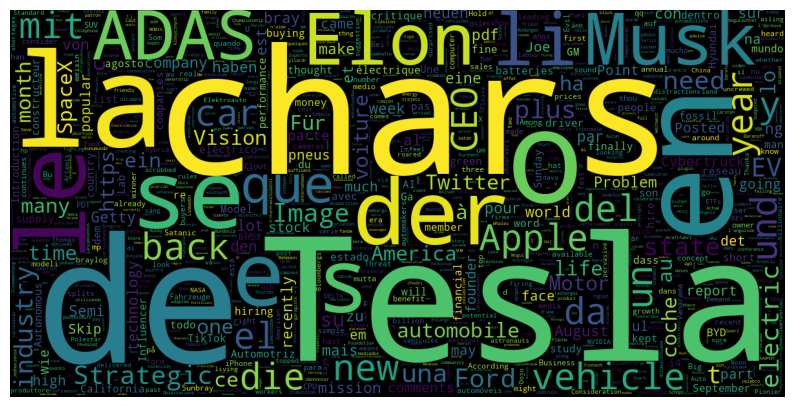

In [73]:
#Wordcloud for API dataset

text = " ".join(i for i in df_.content)

wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [10, 6])
plt.imshow(wc)
plt.axis("off")
plt.show